# Tema: Métodos baseados em árvores 

## Alunos: 
   
   * Ana Zucon
   * Gabriel Felipe
   * Marina Schwab

## Objetivo
Classificar três espécies de pinguins: Adelie, Gentoo ou Chinstrap; com base em características físicas e geográficas, disponíveis em uma base de dados encontrada no Kaggle. Escolhemos esse dataset pois é bastante simples e deixa bem evidente como os métodos funcionam.

## Base de dados

São 344 observações e 7 covariáveis, sendo a variável "species" nossa resposta.


## Pacotes utilizados

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import random
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import seaborn.apionly as sns

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

C:\Users\briel\anaconda3\envs\machine\lib\site-packages\seaborn\apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Análise descritiva dos dados

In [2]:
dados = pd.read_csv("penguins.csv")

In [3]:
dados.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


O que são as covariáveis?

![](image.jpg)

### Verificando se existem dados faltantes

In [4]:
dados.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [5]:
dados.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### Dimensão dos dados

In [6]:
dados.shape

(344, 7)

In [7]:
dados.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Correlação das covariáveis

In [8]:
dados.corr().style.background_gradient(cmap='coolwarm')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


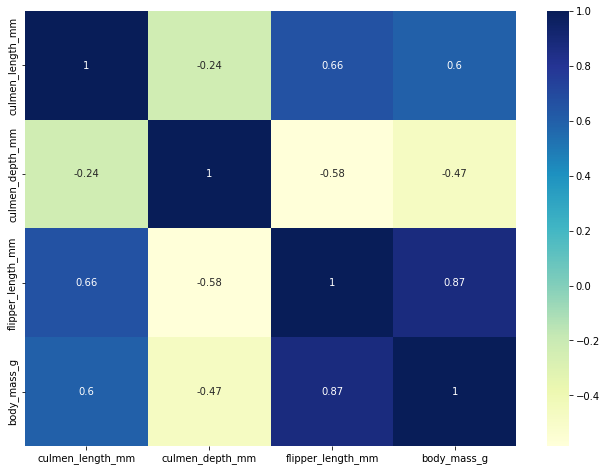

In [9]:
plt.figure(figsize=(11,8))
sns.heatmap(dados.corr(),cmap="YlGnBu",annot=True)
plt.show()

Quantidade de observações para cada espécie

In [10]:
dados['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [11]:
dados['species'].value_counts().iplot(kind='bar', colors='blue')

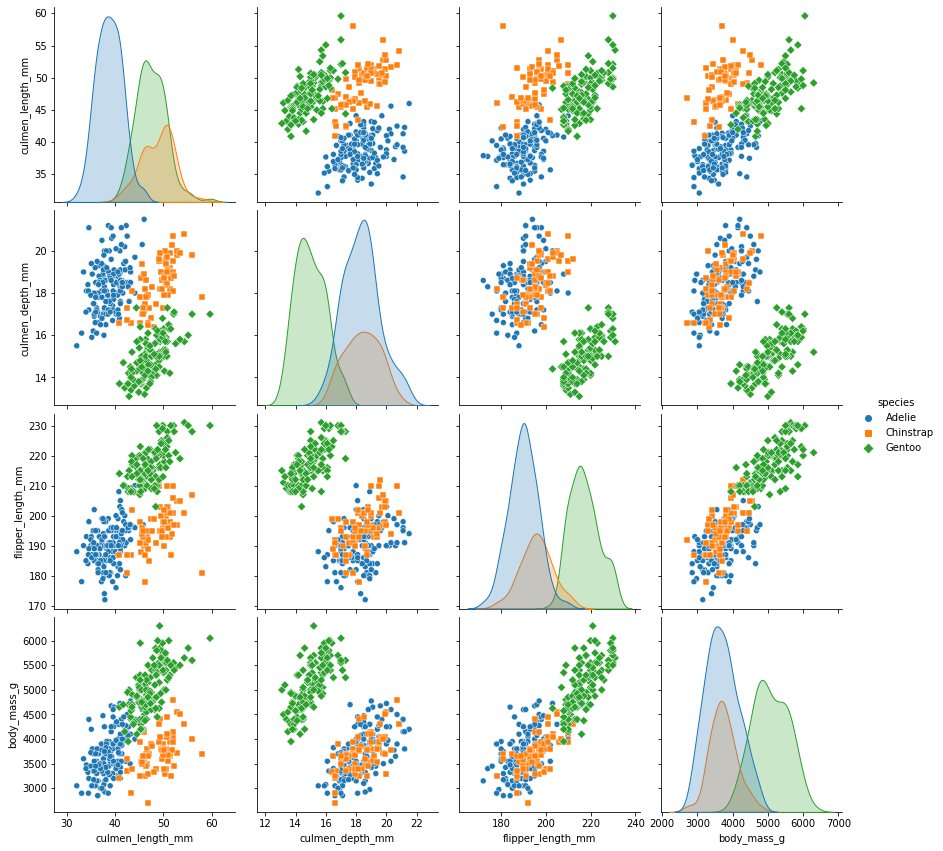

In [12]:
sns.pairplot(dados, hue="species", height=3,markers=["o", "s", "D"])

## Duas abordagens manuais usando árvores de decisão

### 1ª abordagem

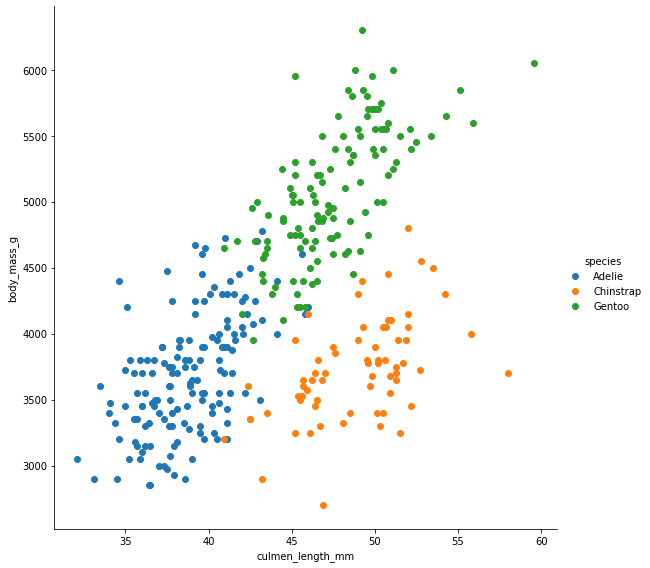

In [13]:
sns.FacetGrid(dados, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "body_mass_g") \
   .add_legend()

### 2ª abordagem

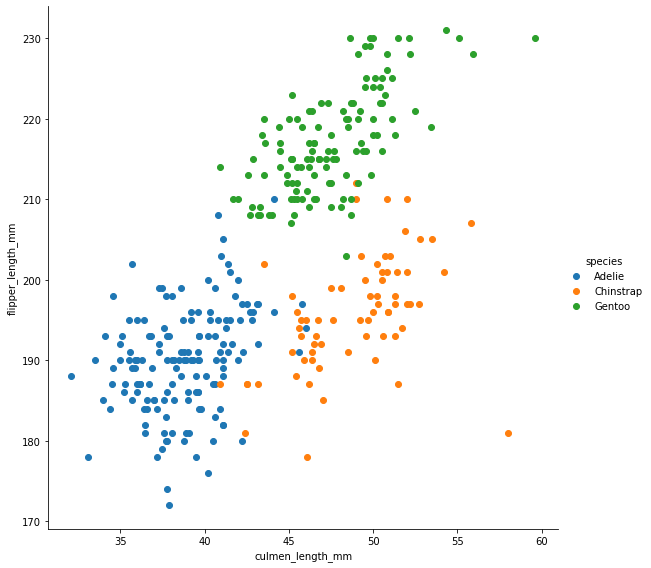

In [14]:
sns.FacetGrid(dados, hue="species", height=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

### Implementação 1

In [15]:
def arvore_um(dados):
    y_hat = ["null"]*len(dados['species'])
    for i in range(len(dados['species'])):
        if dados['body_mass_g'][i] > 4250:
            y_hat[i] = 'Gentoo'
        else:
            if dados['culmen_length_mm'][i] < 45:
                y_hat[i] = 'Adelie'
            else:
                y_hat[i] = 'Chinstrap'
    return y_hat

In [16]:
y_hat1 = arvore_um(dados)

In [17]:
y_hat1[0:9]

['Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Gentoo',
 'Adelie']

### Matriz de confusão para a primeira abordagem e acurácia

In [18]:
confusion_matrix(dados['species'], y_hat1)

array([[129,   3,  20],
       [  6,  55,   7],
       [  3,   4, 117]], dtype=int64)

In [19]:
print('A acurácia para a primeira abordgem foi de : {0:0.4f}'. format(accuracy_score(dados['species'], y_hat1)))

A acurácia para a primeira abordgem foi de : 0.8750


### Implementação 2

In [20]:
def arvore_dois(dados):
    y_hat = ["null"]*len(dados['species'])
    for i in range(len(dados['species'])):
        if dados['flipper_length_mm'][i] > 207:
            y_hat[i] = 'Gentoo'
        else:
            if dados['culmen_length_mm'][i] < 45:
                y_hat[i] = 'Adelie'
            else:
                y_hat[i] = 'Chinstrap'
    return y_hat

In [21]:
y_hat2 = arvore_dois(dados)

In [22]:
y_hat2[0:9]

['Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie']

### Matriz de confusão para a segunda abordagem e acurácia

In [23]:
print('A acurácia para a segunda abordgem foi de : {0:0.4f}'. format(accuracy_score(dados['species'], y_hat2)))

A acurácia para a segunda abordgem foi de : 0.9448


## Usando os pacotes do python

## Árvores de decisão

### Seleção das variáveis e one hot encoding

In [24]:
dados = pd.read_csv("penguins.csv")
# Removendo dados missing
dados = dados.dropna()
dados = dados[dados['sex'] != "."]
# Separação entre variável resposta e variáveis explicativas
X = dados.drop('species',1)
y = pd.DataFrame(dados['species'])
# One hot encoding
X = pd.get_dummies(X)

C:\Users\briel\AppData\Local\Temp/ipykernel_12440/3796032113.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



## Separação entre treinamento e validação

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treino e 30% teste

In [26]:
# Criando a árvore de decisão
arvore_tres = DecisionTreeClassifier(criterion = 'gini')

In [27]:
# Treinando o modelo
arvore_tres = arvore_tres.fit(X_train,y_train)

In [28]:
# Predição 
y_hat = arvore_tres.predict(X_test)

### Métricas do modelo

In [29]:
# Matriz de confusão
confusion_matrix(y_test, y_hat)

array([[42,  1,  0],
       [ 2, 25,  0],
       [ 1,  0, 29]], dtype=int64)

In [30]:
print('A acurácia foi de : {0:0.4f}'. format(accuracy_score(y_test, y_hat)))

A acurácia foi de : 0.9600


### Validação K-fold

In [5]:
def kfold(dados, k):
    dados = dados.dropna()
    dados = dados[dados['sex'] != "."]
    dados = dados.sample(n=len(dados))
    folds = np.array_split(dados, k)
    return folds

In [32]:
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)

### Calculando a acurácia média dos k-folds

In [ ]:
# Separando em k-folds
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)
# Realizando os cálculos
valida = len(folds)-1
acuracia = []
for i in range(0, len(folds)):
    print('O fold de validação foi o : {0:0.0f}'. format(valida))
    # Tratando
    d = list(folds) 
    del d[valida]
    dados = pd.concat(d)
    # Separação entre variável resposta e variáveis explicativas
    X = dados.drop('species',1)
    y = pd.DataFrame(dados['species'])
    # One hot encoding
    X = pd.get_dummies(X)
    # Modelo
    arvore_tres = DecisionTreeClassifier(criterion = 'gini')
    # Ajuste
    arvore_tres = arvore_tres.fit(X,y)
    # Validacao
    dados_validacao = folds[valida]
    X_valida = dados_validacao.drop('species',1)
    X_valida = pd.get_dummies(X_valida)
    y_valida = pd.DataFrame(dados_validacao['species'])
    y_hat = arvore_tres.predict(X_valida)
    # Acurácia
    acuracia.append(accuracy_score(y_valida, y_hat))
    # Trocando validacao
    valida = valida-1

In [34]:
# Resultados
acuracia_final = sum(acuracia)/len(folds)
print('A acurácia média dos k-folds foi de : {0:0.4f}'. format(acuracia_final))

A acurácia média dos k-folds foi de : 0.9669


### Validação por holdout repetido

In [ ]:
dados = pd.read_csv("penguins.csv")
dados = dados.dropna()
dados = dados[dados['sex'] != "."]
acuracia_hold = []
n=5
for i in range(0,n):
    smp_size = math.floor(0.75 * len(dados))
    geral = list(pd.DataFrame(range(0, len(dados)))[0])
    treino_ind = pd.DataFrame(range(0, len(dados))).sample(n=smp_size, replace=False).index
    validacao_ind = [item for item in geral if item not in treino_ind]
    dados_treino = dados.iloc[treino_ind]
    dados_validacao = dados.iloc[validacao_ind]
    X_train = pd.get_dummies(dados_treino.drop('species',1))
    X_test = pd.get_dummies(dados_validacao.drop('species',1))
    y_train = dados_treino['species']
    y_test = dados_validacao['species']
    # Criando a árvore de decisão
    arvore_tres = DecisionTreeClassifier(criterion = 'gini')
    # Treinando o modelo
    arvore_tres = arvore_tres.fit(X_train,y_train)
    # Predição 
    y_hat = arvore_tres.predict(X_test)
    # Acurácia
    acuracia_hold.append(accuracy_score(y_test, y_hat))

In [36]:
# Resultados
acuracia_final_hold = sum(acuracia_hold)/n
print('A acurácia média do holdout repetido 5 vezes foi de : {0:0.4f}'. format(acuracia_final_hold))

A acurácia média do holdout repetido 30 vezes foi de : 0.9643


### Visualizando o modelo

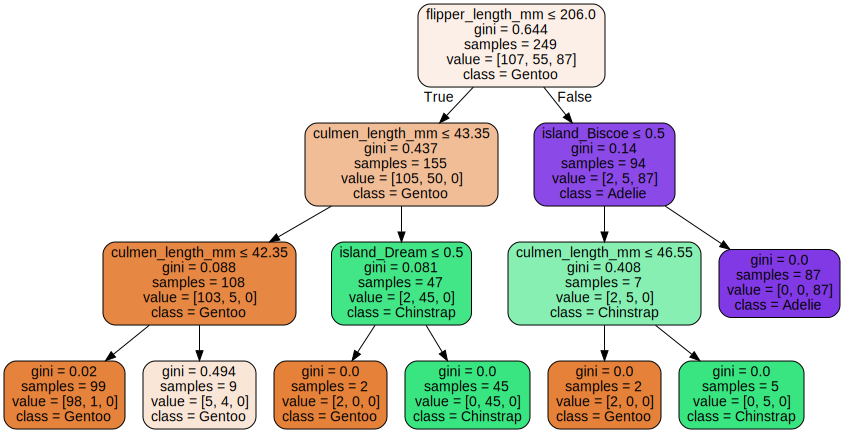

In [57]:
# Criando objeto com o nome das features e targets
nomes_features = [item for item in X_train.columns]
nomes_target = y_train.unique()
# Plotando a árvore resultante
dot_data = tree.export_graphviz(arvore_tres, out_file=None,
                      feature_names=nomes,  
                      class_names=nomes_target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Random Forest

### Validação com k-fold

In [ ]:
# Separando em k-folds
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)
# Realizando os cálculos
valida = len(folds)-1
acuracia_florestinha = []
for i in range(0, len(folds)):
    print('O fold de validação foi o : {0:0.0f}'. format(valida))
    # Tratando
    d = list(folds) 
    del d[valida]
    dados = pd.concat(d)
    # Separação entre variável resposta e variáveis explicativas
    X = dados.drop('species',1)
    y = pd.DataFrame(dados['species'])
    # One hot encoding
    X = pd.get_dummies(X)
    # Modelo
    florestinha = RandomForestClassifier()
    # Ajuste
    florestinha = florestinha.fit(X,y.values.ravel())
    # Validacao
    dados_validacao = folds[valida]
    X_valida = dados_validacao.drop('species',1)
    X_valida = pd.get_dummies(X_valida)
    y_valida = pd.DataFrame(dados_validacao['species'])
    y_hat = florestinha.predict(X_valida)
    # Acurácia
    acuracia_florestinha.append(accuracy_score(y_valida, y_hat))
    # Trocando validacao
    valida = valida-1

In [120]:
# Resultados
acuracia_final_florestinha = sum(acuracia_florestinha)/len(folds)
print('A acurácia média dos k-folds foi de : {0:0.4f}'. format(acuracia_final_florestinha))

A acurácia média dos k-folds foi de : 0.9940


### Tunando parâmetros do Random Forest

In [ ]:
# Carregando os dados
dados = pd.read_csv("penguins.csv")
# Removendo dados missing
dados = dados.dropna()
dados = dados[dados['sex'] != "."]
# Separação entre variável resposta e variáveis explicativas
X = dados.drop('species',1)
y = pd.DataFrame(dados['species'])
# One hot encoding
X = pd.get_dummies(X)
# Separando entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treino e 30% teste

Por padrão a função GridSearchCV usa a acurácia como medidade de qualidade para escolher os hiperparâmetros.

Descrição dos parâmetros que iremos tunar:

* max_depth: Profundidade máxima de uma árvore que compõe a floresta 
* max_features: O maior número de features (covariáveis) a serem consideradas quando o algoritmo está buscando pela melhor ramificação
* n_estimators: Número de árvores na floresta (Random Forest)

Quando max_features = auto a função usa a raíz quadrada.


In [147]:
# Criando grid com os parâmetros que vão ser testados
param_grid = {
    "max_depth": [2, 3, 4, 5, 6],
    "max_features": ["auto", "sqrt", "log2"],
    "n_estimators": [10, 20, 50, 100]
}
# Criando o modelo
rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10)
rf_cv.fit(X_train, y_train.values.ravel())

# Mostrando os melhores parâmetros
rf_cv.best_params_

{'max_depth': 6, 'max_features': 'log2', 'n_estimators': 20}

### Ajustando o modelo novamente com os parâmetros encontrados

In [ ]:
# Separando em k-folds
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)
# Realizando os cálculos
valida = len(folds)-1
acuracia_tunning = []
for i in range(0, len(folds)):
    print('O fold de validação foi o : {0:0.0f}'. format(valida))
    # Tratando
    d = list(folds) 
    del d[valida]
    dados = pd.concat(d)
    # Separação entre variável resposta e variáveis explicativas
    X = dados.drop('species',1)
    y = pd.DataFrame(dados['species'])
    # One hot encoding
    X = pd.get_dummies(X)
    # Modelo com os parâmetros atualizados 
    florestinha = RandomForestClassifier(max_depth=6, max_features='log2', n_estimators=20)
    # Ajuste
    florestinha = florestinha.fit(X,y.values.ravel())
    # Validacao
    dados_validacao = folds[valida]
    X_valida = dados_validacao.drop('species',1)
    X_valida = pd.get_dummies(X_valida)
    y_valida = pd.DataFrame(dados_validacao['species'])
    y_hat = florestinha.predict(X_valida)
    # Acurácia
    acuracia_tunning.append(accuracy_score(y_valida, y_hat))
    # Trocando validacao
    valida = valida-1

In [153]:
# Resultados
acuracia_final_tunning = sum(acuracia_tunning)/len(folds)
print('A acurácia média dos k-folds foi de : {0:0.4f}'. format(acuracia_final_tunning))

A acurácia média dos k-folds foi de : 0.9940


## AdaBoosting

### Validação por k-fold

In [ ]:
# Separando em k-folds
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)
# Realizando os cálculos
valida = len(folds)-1
acuracia_adb = []
for i in range(0, len(folds)):
    print('O fold de validação foi o : {0:0.0f}'. format(valida))
    # Tratando
    d = list(folds) 
    del d[valida]
    dados = pd.concat(d)
    # Separação entre variável resposta e variáveis explicativas
    X = dados.drop('species',1)
    y = pd.DataFrame(dados['species'])
    # One hot encoding
    X = pd.get_dummies(X)
    # Modelo
    adb = AdaBoostClassifier()
    # Ajuste
    adb = adb.fit(X,y.values.ravel())
    # Validacao
    dados_validacao = folds[valida]
    X_valida = dados_validacao.drop('species',1)
    X_valida = pd.get_dummies(X_valida)
    y_valida = pd.DataFrame(dados_validacao['species'])
    y_hat = adb.predict(X_valida)
    # Acurácia
    acuracia_adb.append(accuracy_score(y_valida, y_hat))
    # Trocando validacao
    valida = valida-1

In [29]:
# Resultados
acuracia_final_adb = sum(acuracia_adb)/len(folds)
print('A acurácia média dos k-folds foi de : {0:0.4f}'. format(acuracia_final_adb))

A acurácia média dos k-folds foi de : 0.8379


### Tunando parâmetros do Adaboost

In [ ]:
# Carregando os dados
dados = pd.read_csv("penguins.csv")
# Removendo dados missing
dados = dados.dropna()
dados = dados[dados['sex'] != "."]
# Separação entre variável resposta e variáveis explicativas
X = dados.drop('species',1)
y = pd.DataFrame(dados['species'])
# One hot encoding
X = pd.get_dummies(X)
# Separando entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treino e 30% teste

Por padrão a função GridSearchCV usa a acurácia como medidade de qualidade para escolher os hiperparâmetros.

Descrição dos parâmetros que iremos tunar:

* base_estimator: Estimador base no qual o 'boosted ensemble' é criado, por padrão é o DecisionTreeClassifier.
* n_estimators: Número máximo de estimadores no qual o boosting é determinado.
* learning_rate: Peso aplicado para cada classificador em cada iteração do boosting

In [36]:
# Criando grid com os parâmetros que vão ser testados
param_grid = {
    "n_estimators": [10,20,50,100,150],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 0.5, 0.8, 1]
}
# Criando o modelo
adb = AdaBoostClassifier()
adb_cv = GridSearchCV(estimator=adb, param_grid=param_grid, cv=10)
adb_cv.fit(X_train, y_train.values.ravel())

# Mostrando os melhores parâmetros
adb_cv.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

### Ajustando o modelo novamente com os parâmetros encontrados

In [ ]:
# Separando em k-folds
dados = pd.read_csv("penguins.csv")
folds = kfold(dados,5)
# Realizando os cálculos
valida = len(folds)-1
acuracia_adb_tunado = []
for i in range(0, len(folds)):
    print('O fold de validação foi o : {0:0.0f}'. format(valida))
    # Tratando
    d = list(folds) 
    del d[valida]
    dados = pd.concat(d)
    # Separação entre variável resposta e variáveis explicativas
    X = dados.drop('species',1)
    y = pd.DataFrame(dados['species'])
    # One hot encoding
    X = pd.get_dummies(X)
    # Modelo
    adb = AdaBoostClassifier(learning_rate = 0.5, n_estimators = 100)
    # Ajuste
    adb = adb.fit(X,y.values.ravel())
    # Validacao
    dados_validacao = folds[valida]
    X_valida = dados_validacao.drop('species',1)
    X_valida = pd.get_dummies(X_valida)
    y_valida = pd.DataFrame(dados_validacao['species'])
    y_hat = adb.predict(X_valida)
    # Acurácia
    acuracia_adb_tunado.append(accuracy_score(y_valida, y_hat))
    # Trocando validacao
    valida = valida-1

In [40]:
# Resultados
acuracia_final_adb_tunado = sum(acuracia_adb_tunado)/len(folds)
print('A acurácia média dos k-folds foi de : {0:0.4f}'. format(acuracia_final_adb_tunado))

A acurácia média dos k-folds foi de : 0.9910


Podemos perceber que após a tunagem dos hiperparâmetros o modelo obteve uma melhora expressiva nos resultados, indo de uma acurácia media de 0.83 para 0.97.